# Alignment Matrices and Tracebacks

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sequence_alignment as seq

In [2]:
cm = "Blues"

## Matrix Representation

Given two sequences of size $m, n$ - you can come up with a matrix representation of all possible alignments between them.

In [3]:
seq_1 = "ATATTGTAG"
seq_2 = "ATTTTA"

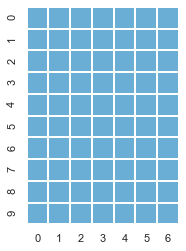

In [4]:
m = len(seq_1); n = len(seq_2)
mat = np.zeros([m+1,n+1])
sns.heatmap(mat,linecolor='white',linewidth=1,cmap=cm,square=True,vmin=-1,vmax=1,cbar=False);

In the above matrix, a series of connected elements from the bottom right corner to the top left corner represents a global alignment. Local alignment tracebacks are discussed in a different notebook.

Let's write a function to go from a particular matrix alignment to an alignment between the sequences. This is known as a _traceback_.

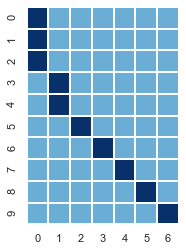

In [5]:
mat[0:3,0]=1; mat[range(4,10),range(1,7)]=1; mat[3,1]=1
sns.heatmap(mat,linecolor='white',linewidth=1,cmap=cm,square=True,vmin=-1,vmax=1,cbar=False);

The `seq.traceback` function performs a traceback on the matrix.

In [6]:
alignment = seq.traceback(mat,seq_1,seq_2,representation=True)
print("",alignment[0],"\n",alignment[1])

 ATATTGTAG 
 --A-TTTTA


## More Tracebacks

Let's try tracing back a few more matrices.

**Ex. 1.** Sequence 1 is longer than sequence 2.

 ---ATATTGTAG 
 ATTTTA------


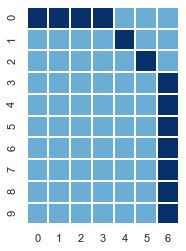

In [7]:
seq_1 = "ATATTGTAG"
seq_2 = "ATTTTA"

m = len(seq_1); n = len(seq_2)
mat = np.zeros([m+1,n+1])
mat[0,0:3]=1; mat[range(0,4),range(3,7)]=1; mat[4:10,-1]=1
sns.heatmap(mat,linecolor='white',linewidth=1,cmap=cm,square=True,vmin=-1,vmax=1,cbar=False);

alignment = seq.traceback(mat,seq_1,seq_2,representation=True)
print("",alignment[0],"\n",alignment[1])

**Ex. 2.** Sequence 1 is the same length as sequence 2.

 ---ATA--TTGTAG 
 ATTTTAGGT-----


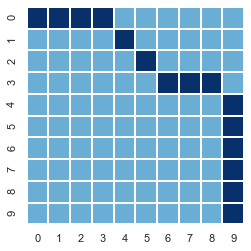

In [8]:
seq_1 = "ATATTGTAG"
seq_2 = "ATTTTAGGT"

m = len(seq_1); n = len(seq_2)
mat = np.zeros([m+1,n+1])
mat[0,0:3]=1; mat[range(0,4),range(3,7)]=1; mat[3,6:-1]=1; mat[4:10,-1]=1
sns.heatmap(mat,linecolor='white',linewidth=1,cmap=cm,square=True,vmin=-1,vmax=1,cbar=False);

alignment = seq.traceback(mat,seq_1,seq_2,representation=True)
print("",alignment[0],"\n",alignment[1])

**Ex. 3.** Sequence 1 is shorter than sequence 2.

 ---ATA-------TTGTAG 
 ATTTTAGGTTTTAA-----


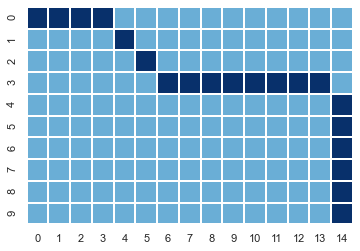

In [9]:
seq_1 = "ATATTGTAG"
seq_2 = "ATTTTAGGTTTTAA"

m = len(seq_1); n = len(seq_2)
mat = np.zeros([m+1,n+1])
mat[0,0:3]=1; mat[range(0,4),range(3,7)]=1; mat[3,6:-1]=1; mat[4:10,-1]=1
sns.heatmap(mat,linecolor='white',linewidth=1,cmap=cm,square=True,vmin=-1,vmax=1,cbar=False);

alignment = seq.traceback(mat,seq_1,seq_2,representation=True)
print("",alignment[0],"\n",alignment[1])

## Bifurcations
What if the matrix alignment has bifurcations?

In our current approach, we travel one of the >2 paths at every bifurcation randomly and spit out one alignment. If the traceback is run a large enough number of times, you can sample all possible alignments. 

 ATATTG--TAG 
 ATTTTAGGT--


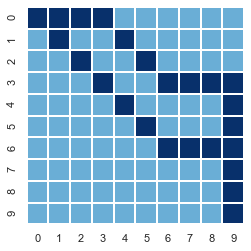

In [10]:
seq_1 = "ATATTGTAG"
seq_2 = "ATTTTAGGT"

m = len(seq_1); n = len(seq_2)
mat = np.zeros([m+1,n+1])
mat[0,0:3]=1; mat[range(0,4),range(3,7)]=1; mat[3,6:]=1; mat[3:10,-1]=1
mat[6,6:]=1; mat[range(0,6),range(0,6)]=1;
sns.heatmap(mat,linecolor='white',linewidth=1,cmap=cm,square=True,vmin=-1,vmax=1,cbar=False);

alignment = seq.traceback(mat,seq_1,seq_2,representation=True)
print("",alignment[0],"\n",alignment[1])

We can use the `seq.traceback_iterator` function to sample a large number of possible solutions and spit out the unique ones.

1. 
 ---ATA---TTGTAG 
 ATTTTAGGT------ 

2. 
 ATATTG--TAG 
 ATTTTAGGT-- 

3. 
 ATATTG---TAG 
 ATTTTAGGT--- 

4. 
 ---ATA--TTGTAG 
 ATTTTAGGT----- 

5. 
 -ATATTG--TAG 
 A-TTTTAGGT-- 

6. 
 -ATATTG---TAG 
 A-TTTTAGGT--- 



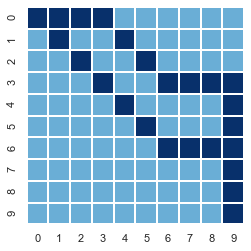

In [11]:
seq_1 = "ATATTGTAG"
seq_2 = "ATTTTAGGT"

m = len(seq_1); n = len(seq_2)
mat = np.zeros([m+1,n+1])
mat[0,0:3]=1; mat[range(0,4),range(3,7)]=1; mat[3,6:]=1; mat[3:10,-1]=1
mat[6,6:]=1; mat[range(0,6),range(0,6)]=1;
sns.heatmap(mat,linecolor='white',linewidth=1,cmap=cm,square=True,vmin=-1,vmax=1,cbar=False);

alignment = seq.traceback_iterator(mat,seq_1,seq_2,representation=True)
for i,e in enumerate(alignment):
    print(str(i+1)+".","\n",e[0],"\n",e[1],"\n")

Using such a random search approach, we can successfully find all 6 possible alignments for the above matrix. This can be made more efficient by memorizing the previous path travelled.

### Taking the high-low road
Instead of wasting our time searching for all alignments, we can spit out the two most different alignments for a bifurcated matrix.

1. 
 ---ATA---TTGTAG 
 ATTTTAGGT------ 

2. 
 ATATTG--TAG 
 ATTTTAGGT-- 



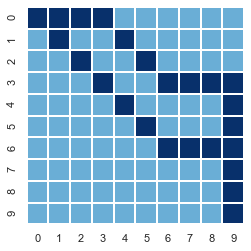

In [12]:
seq_1 = "ATATTGTAG"
seq_2 = "ATTTTAGGT"

m = len(seq_1); n = len(seq_2)
mat = np.zeros([m+1,n+1])
mat[0,0:3]=1; mat[range(0,4),range(3,7)]=1; mat[3,6:]=1; mat[3:10,-1]=1
mat[6,6:]=1; mat[range(0,6),range(0,6)]=1;
sns.heatmap(mat,linecolor='white',linewidth=1,cmap=cm,square=True,vmin=-1,vmax=1,cbar=False);

alignment = seq.traceback_iterator(mat,seq_1,seq_2,representation=True,high_low=True)
for i,e in enumerate(alignment):
    print(str(i+1)+".","\n",e[0],"\n",e[1],"\n")